In [1]:
!pwd 
Data_Dir='/Users/akewakjeba/desktop/CroppedYale'
!ls $Data_Dir
#!ls CroppedYale
#!ls Data_Dir/*

/Users/akewakjeba/Desktop/CroppedYale
Untitled.ipynb           yaleB11                  yaleB27
Untitled1.ipynb          yaleB12                  yaleB28
Untitled2.ipynb          yaleB13                  yaleB29
Untitled3.ipynb          yaleB15                  yaleB30
machine_patt_exerc.ipynb yaleB16                  yaleB31
yaleB01                  yaleB17                  yaleB32
yaleB02                  yaleB18                  yaleB33
yaleB03                  yaleB19                  yaleB34
yaleB04                  yaleB20                  yaleB35
yaleB05                  yaleB21                  yaleB36
yaleB06                  yaleB22                  yaleB37
yaleB07                  yaleB23                  yaleB38
yaleB08                  yaleB24                  yaleB39
yaleB09                  yaleB25
yaleB10                  yaleB26


In [2]:
from glob import glob

%cd $Data_Dir
#yaleB/*.pgm
files=glob('yaleB/*.pgm')
print 'number of files is',len(files)
count=0
for f in files:
    new_f=f[:-3]+'pgm'
    !convert $f $new_f
    count += 1
    if count % 100==0:
        print count,f,new_f



/Users/akewakjeba/Desktop/CroppedYale
number of files is 0


In [3]:
import math
import matplotlib.pyplot as plt
from matplotlib.pyplot import *

def image_grid(D,H,W,cols=10,scale=1):
    """ display a grid of images
        H,W: Height and width of the images
        cols: number of columns = number of images in each row
        scale: 1 to fill screen
    """
    n=np.shape(D)[0]
    rows = int(math.ceil((n+0.0)/cols))
    fig=plt.figure(1,figsize=[scale*20.0/H*W,scale*20.0/cols*rows],dpi=300)
    for i in range(n):
        subplot(rows,cols,i+1)
        fig=plt.imshow(np.reshape(D[i,:],[H,W]), cmap = cm.Greys_r)
        plt.axis('off')

In [4]:
(192*168)**2

1040449536

In [8]:
from PIL import Image
import scipy.misc

SetNo='01'   # can be any number from 01 to 39

#read in files
files=glob('yaleB'+SetNo+'/*.pgm')
files=[name for name in files if name.find('Ambient')==-1]

im_number=len(files)

print 'number of files:',im_number



number of files: 64


In [9]:
#read one file to find out the image size
from numpy import array
import cv2
import math
import numpy as np
im = Image.open(files[0]).convert("L")
(H,W)=np.shape(im)
print 'shape=',(H,W)


shape= (192, 168)


In [11]:
arr=np.zeros([im_number,H*W])
for i in range(im_number):
    im = Image.open(files[i]).convert("L")
    arr[i,:] = np.reshape(np.asarray(im),[1,H*W])

image_grid(arr,H,W)
#plt.show()

In [12]:
np.shape(im)

(192, 168)

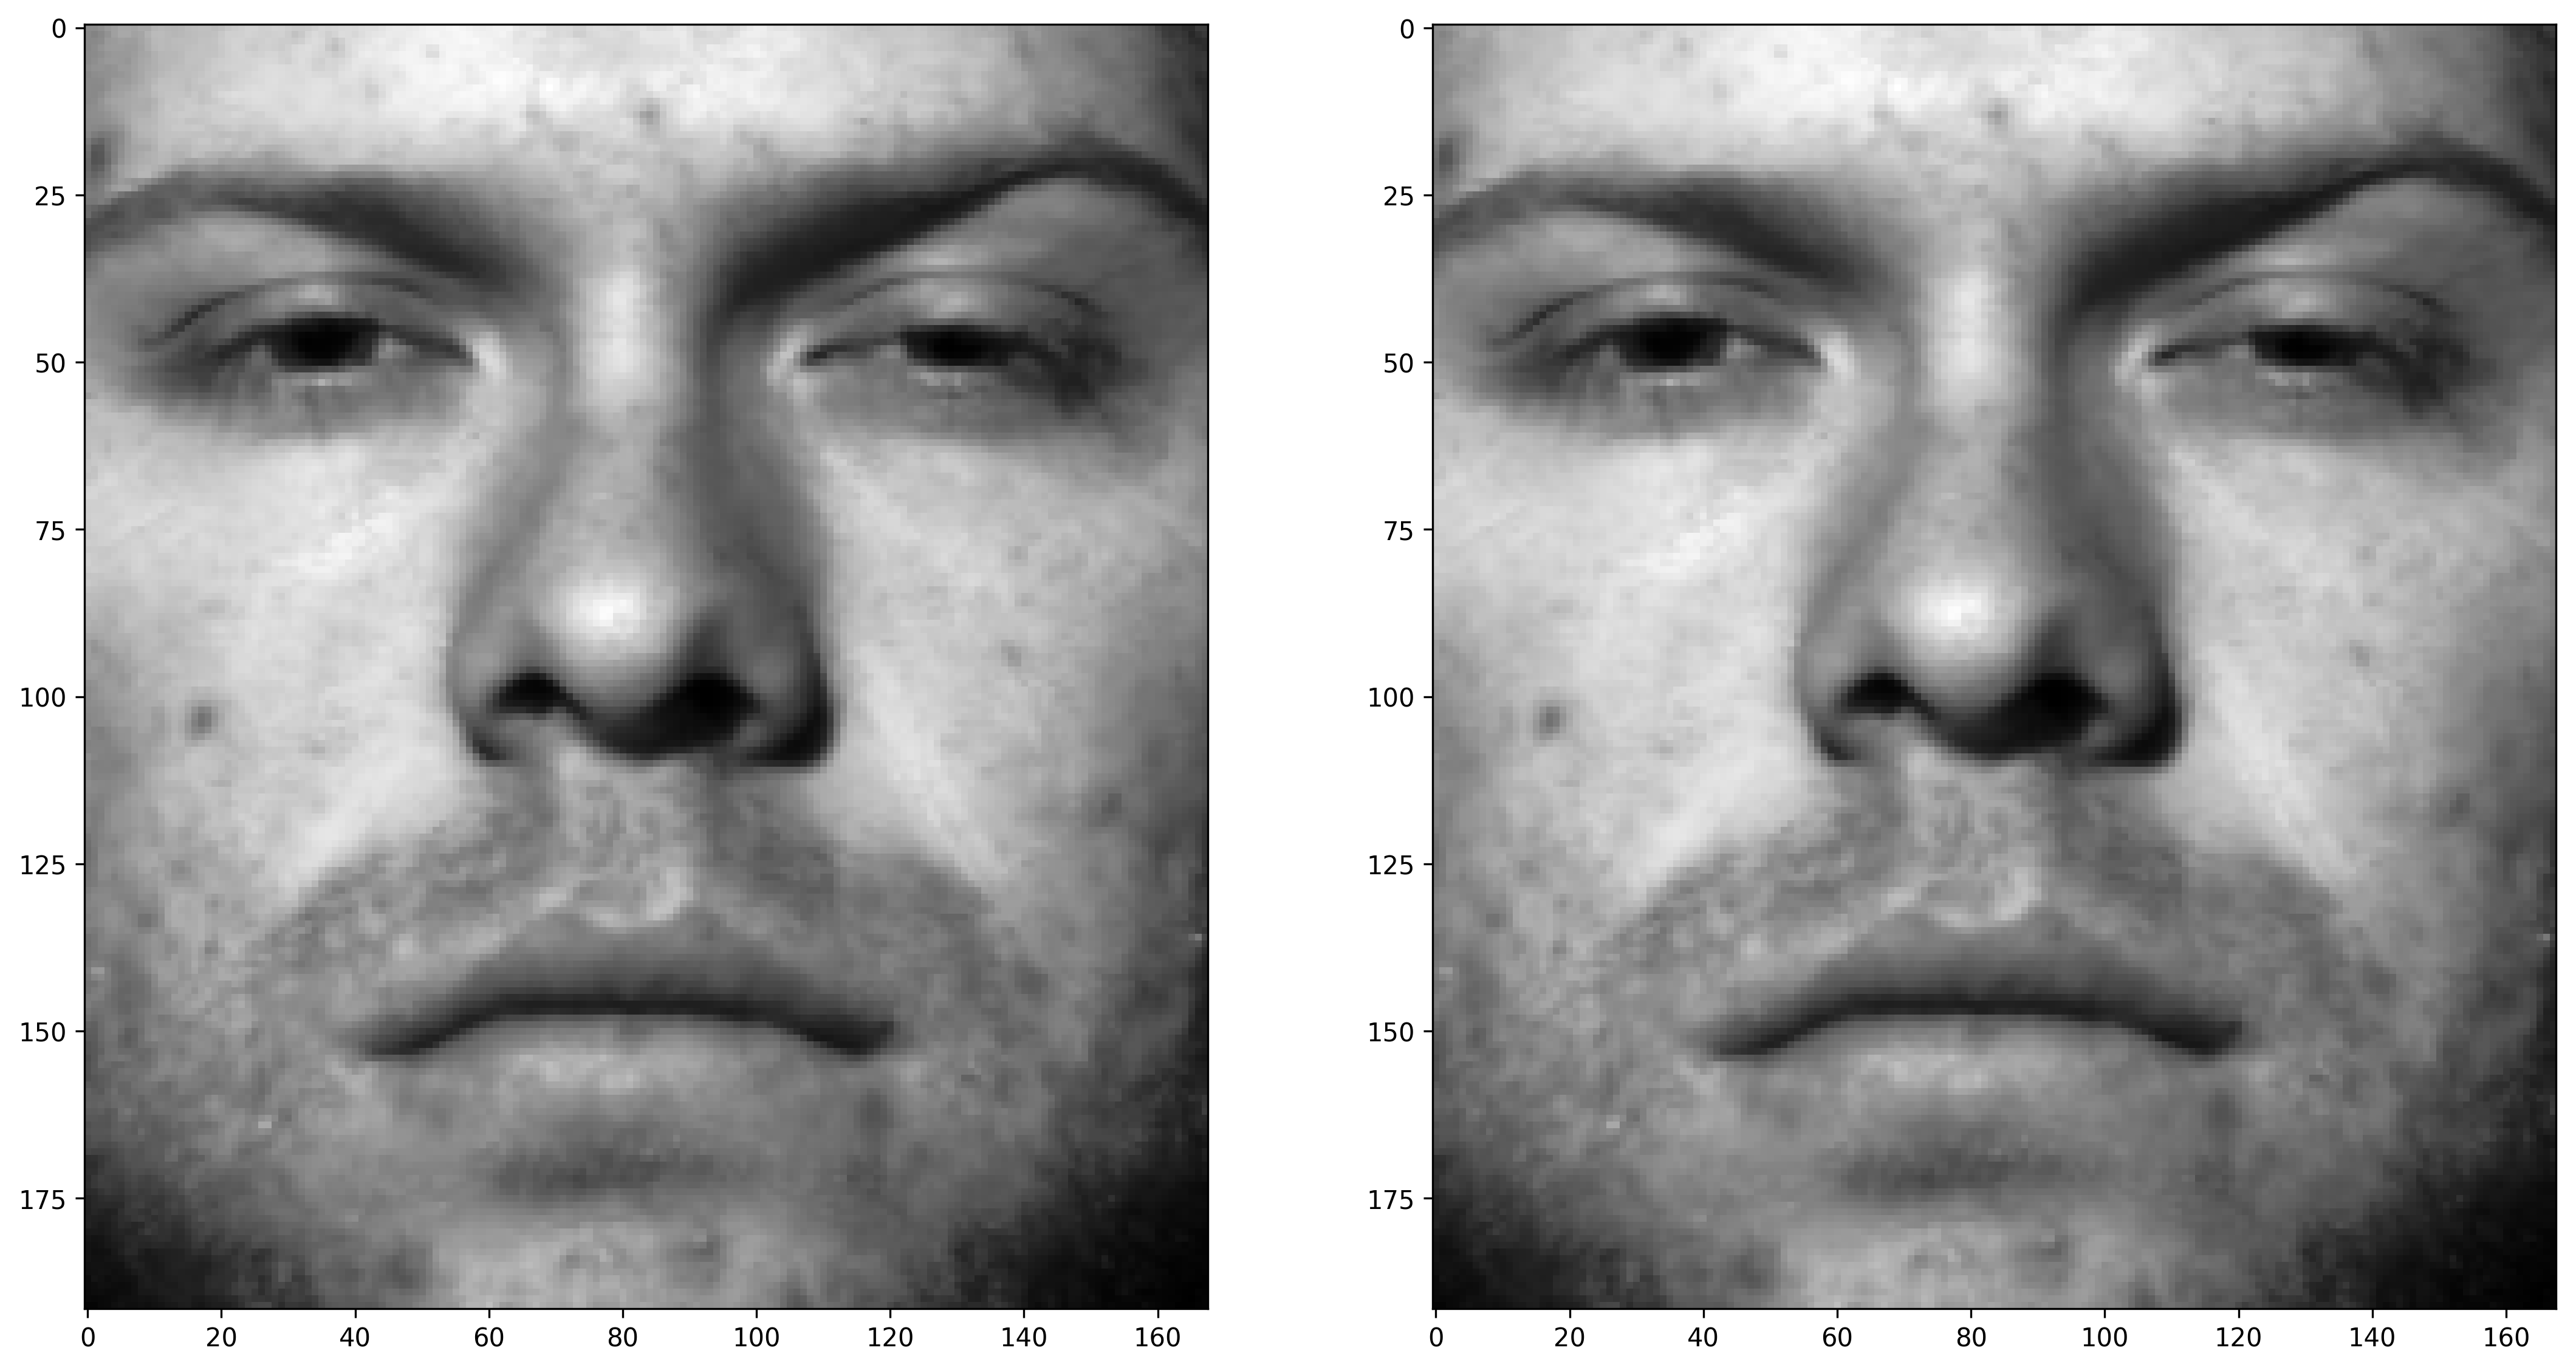

In [13]:
image_i=10
fig=plt.figure(1,figsize=[10,5],dpi=300)
subplot(1,2,1)
plt.imshow(np.reshape(arr[image_i,:],[H,W]), cmap = cm.Greys_r)
# Testing flattening and deflattenning
flat=np.reshape(arr[image_i,:],[H*W])
flat=(flat-np.mean(flat))/np.std(flat)
recon=np.reshape(flat,[H,W])
# Shifting and scaling the image does not change how it is displayed
subplot(1,2,2)
plt.imshow(recon, cmap = cm.Greys_r)
plt.show()

In [14]:
#Normalize all of the images to have mean zero and std 1
means=np.zeros(im_number)
stds=np.zeros(im_number)
means2=np.zeros(im_number)
stds2=np.zeros(im_number)

D0=np.zeros([im_number,H*W])  #the normalized data

for i in range(im_number):
    flat=arr[i,:]
    means[i]=np.mean(flat)
    stds[i]=np.std(flat)
    D0[i,:]=(flat-means[i])/stds[i]
    means2[i]=np.mean(D0[i,:])
    stds2[i]=np.std(D0[i,:])
print 'means=',means, 
print 'means2=',means2 
print 'stds=',stds
print 'stds2=',stds2
print 'D0=',D0
len(D0)


means= [ 114.59136285  116.48254588  106.80484251   15.72088914  105.98025174
   85.20653522  121.40175471  115.42584325  126.05837674  106.25914559
  115.47008309  108.89115203  102.83144221   69.5483941    85.45141989
  105.20858135   94.33869668   62.44552951   85.19162326   79.85993304
   55.81361607   82.99959697   66.48859127   78.27021329   61.80636161
   52.72913566   60.68830605   53.49100942   47.50037202   37.52824281
   29.07666791   16.66744172   31.36582341   20.8546317    16.67429315
  105.4875372   125.4234251   118.19890873  102.20300099  127.17122396
  127.78831845  111.23291791   79.41297743  114.7514881   109.12208581
  100.07121156   58.23964534   97.32564484  100.33426339   68.18464782
   91.89112103   73.05177331   74.11383929   69.44019717   50.21307664
   66.85903398   51.11290923   50.94810268   34.31529018   33.7124256
   21.52287946   29.78887649   20.38061136   14.73552207] means2= [ -1.69176842e-16   0.00000000e+00   5.63922806e-17  -2.81961403e-17
  -1.05

64

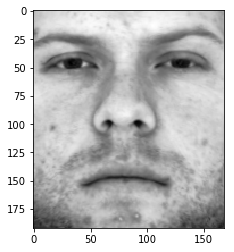

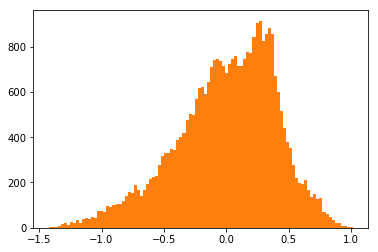

In [15]:
mean_image=np.zeros(H*W)
for i in range(im_number):
    mean_image=mean_image+D0[i,:]
mean_image=mean_image/im_number
plt.imshow(np.reshape(mean_image,[H,W]), cmap = cm.Greys_r)
figure()
hist(mean_image,bins=100);
plt.show(hist(mean_image,bins=100))

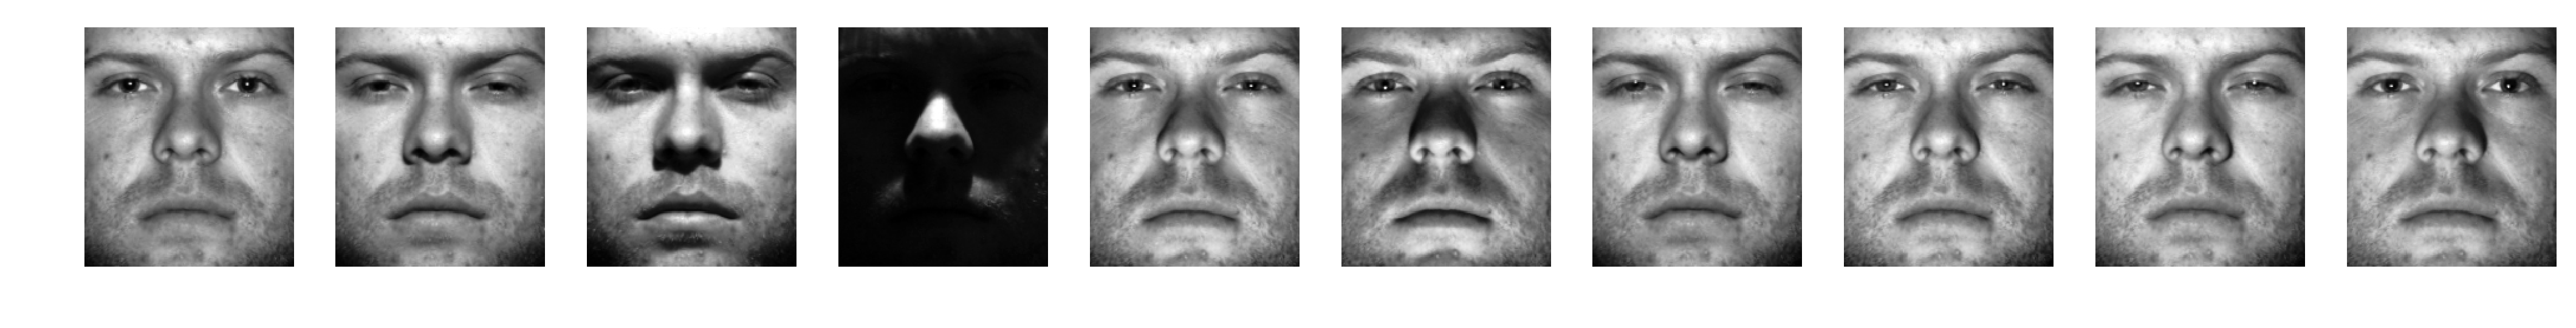

In [16]:
D1=0*D0
for i in range(im_number):
    D1[i,:]=D0[i,:] - mean_image
image_grid(D0[:10,:],H,W)
plt.show()

In [50]:
image_grid(D1[:10,:],H,W)
plt.show()

In [17]:
def err(V):
    """ err = the average of the square values """
    return np.dot(V,V)/len(V)

def meanErr(D):
    """ meanErr = the average err over all rows of D """
    total_err=0
    n=np.shape(D)[0]
    for i in range(n):
        total_err += err(D[i,:])
    return total_err/n
print 'before subtracting mean mean err=',meanErr(D0)
print 'after subtracting mean mean err=',meanErr(D1)

before subtracting mean mean err= 1.0
after subtracting mean mean err= 0.841017412431


In [18]:
from numpy.linalg import norm
import copy

k=20; L=10

R=copy.copy(D1)   #R is a matrix in which each row is the residual vector after the current eigenvectors have been projected out.
eigvecs=np.zeros([k,H*W])
Coeffs=np.zeros([im_number,k])  # Coeffs holds the coefficients of the eigenvectors that approximate each image
var_remaining=np.zeros(k)

factor=im_number*H*W

for e in range(k):
    print 'starting on eigenvec',e
    V=np.random.normal(size=H*W)  # V is the "current vector" in the eigenvector finding algorithm.
    V=V/norm(V)

    # Iterate L times through the data to find the next eigenvector.
    for j in range(L):
        acc_length=0; acc_explained=0
        Vprev=V/norm(V)
        for i in range(im_number):
            X=R[i,:]
            d=np.dot(V,X)/norm(V)
            V=V+d*X
            #print acc_length,acc_explained
            acc_length += np.dot(X,X)
            acc_explained += d*d
        NV=V/norm(V) # normalized version of updated vector
        print '%4d: change=%5.4f, total variance=%5.4f, captured variance=%5.4f' % (j,norm(NV-Vprev),acc_length/factor,acc_explained/factor)
    var_remaining[e]=acc_length/factor
    eigvecs[e,:]=NV
    # subtract projection on V from each data vector
    for i in range(im_number):
        X=R[i,:]
        d=np.dot(X,NV)
        Coeffs[i,e]=d
        X=X-NV*d
        R[i,:]=X

starting on eigenvec 0
   0: change=1.4218, total variance=0.8410, captured variance=0.3349
   1: change=0.0589, total variance=0.8410, captured variance=0.3859
   2: change=0.0227, total variance=0.8410, captured variance=0.3898
   3: change=0.0124, total variance=0.8410, captured variance=0.3912
   4: change=0.0079, total variance=0.8410, captured variance=0.3919
   5: change=0.0056, total variance=0.8410, captured variance=0.3923
   6: change=0.0042, total variance=0.8410, captured variance=0.3926
   7: change=0.0033, total variance=0.8410, captured variance=0.3928
   8: change=0.0026, total variance=0.8410, captured variance=0.3929
   9: change=0.0022, total variance=0.8410, captured variance=0.3931
starting on eigenvec 1
   0: change=1.4150, total variance=0.4474, captured variance=0.1367
   1: change=0.1329, total variance=0.4474, captured variance=0.1686
   2: change=0.0659, total variance=0.4474, captured variance=0.1752
   3: change=0.0413, total variance=0.4474, captured vari

   1: change=0.1689, total variance=0.0334, captured variance=0.0017
   2: change=0.1096, total variance=0.0334, captured variance=0.0020
   3: change=0.0925, total variance=0.0334, captured variance=0.0022
   4: change=0.0810, total variance=0.0334, captured variance=0.0023
   5: change=0.0713, total variance=0.0334, captured variance=0.0025
   6: change=0.0628, total variance=0.0334, captured variance=0.0026
   7: change=0.0554, total variance=0.0334, captured variance=0.0028
   8: change=0.0489, total variance=0.0334, captured variance=0.0029
   9: change=0.0434, total variance=0.0334, captured variance=0.0030
starting on eigenvec 13
   0: change=1.4145, total variance=0.0303, captured variance=0.0014
   1: change=0.1175, total variance=0.0303, captured variance=0.0026
   2: change=0.0631, total variance=0.0303, captured variance=0.0029
   3: change=0.0406, total variance=0.0303, captured variance=0.0030
   4: change=0.0289, total variance=0.0303, captured variance=0.0031
   5: chan

[ 49.22284394  26.18354493  15.3776917    8.45657918   7.03778112
   5.52336508   4.15310347   3.47546012   3.13335694   2.77068874
   2.46627278   2.22846493   1.95487899   1.77260298   1.58065454
   1.42597077   1.31501008   1.21377364   1.1062991    1.        ]


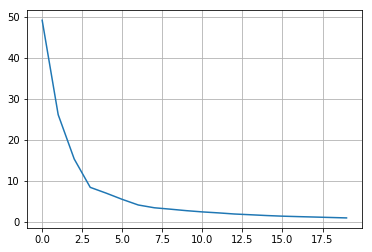

In [19]:
print var_remaining/var_remaining[19]
plot(var_remaining/var_remaining[19]);
grid()
plt.show()

In [ ]:
print 'after subtracting mean mean err=',meanErr(D1)

In [75]:
tmp=np.zeros([k+1,H*W])
tmp[0,:]=mean_image
tmp[1:,:]=eigvecs
image_grid(tmp,H,W,cols=5)
#plt.show()

In [91]:
from PIL import Image
import scipy.misc

SetNo='01'   # can be any number from 01 to 39

#read in files
X_train=glob('yaleB'+SetNo+'/*.pgm')
X_train=[name for name in X_train if name.find('Ambient')==-1]

im_number=len(X_train)

print 'number of files:',im_number

number of files: 64


In [92]:
#read one file to find out the image size
from numpy import array
import cv2
import math
import numpy as np
im_train = Image.open(X_train[0]).convert("L")
(H,W)=np.shape(im_train)
print 'shape=',(H,W)

shape= (192, 168)


In [89]:
from sklearn.decomposition import PCA
n_components = 150

pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(im_train)

In [90]:
X_train_pca = pca.transform(im_train)


In [93]:
from PIL import Image
import scipy.misc

SetNo='02'   # can be any number from 01 to 39

#read in files
X_test=glob('yaleB'+SetNo+'/*.pgm')
X_test=[name for name in X_test if name.find('Ambient')==-1]

im_number=len(X_test)

print 'number of files:',im_number

number of files: 64


In [95]:
#read one file to find out the image size
from numpy import array
import cv2
import math
import numpy as np
im_test = Image.open(X_test[0]).convert("L")
(H,W)=np.shape(im_test)
print 'shape=',(H,W)

shape= (192, 168)


In [97]:
from sklearn.decomposition import PCA
n_components = 150

pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(im_test)

In [99]:
X_test_pca = pca.transform(im_test)


In [102]:
from PIL import Image
import scipy.misc

SetNo='03'   # can be any number from 01 to 39

#read in files
Y_train=glob('yaleB'+SetNo+'/*.pgm')
Y_train=[name for name in Y_train if name.find('Ambient')==-1]

im_number=len(Y_train)

print 'number of files:',im_number

number of files: 64


In [103]:
#read one file to find out the image size
from numpy import array
import cv2
import math
import numpy as np
im_Y_train = Image.open(Y_train[0]).convert("L")
(H,W)=np.shape(im_Y_train)
print 'shape=',(H,W)

shape= (192, 168)


In [104]:
from PIL import Image
import scipy.misc

SetNo='04'   # can be any number from 01 to 39

#read in files
X_train=glob('yaleB'+SetNo+'/*.pgm')
X_train=[name for name in X_train if name.find('Ambient')==-1]

im_number=len(X_train)

print 'number of files:',im_number

number of files: 64


In [122]:
#read one file to find out the image size
from numpy import array
import cv2
import math
import numpy as np
im_X_train = Image.open(X_train[0]).convert("L")
(H,W)=np.shape(im_X_train)
print 'shape=',(H,W)

shape= (192, 168)


In [1]:
im_X_train

NameError: name 'im_X_train' is not defined

In [128]:
eigenfaces = X_train_pca.components_.reshape((n_components, H, W))

print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("done in %0.3fs" % (time() - t0))

AttributeError: 'numpy.ndarray' object has no attribute 'components_'

In [125]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True) 

#clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
param_grid = { 
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 2)

CV_rfc = CV_rfc.fit(X_train,Y_train)

ValueError: n_splits=2 cannot be greater than the number of members in each class.